<a href="https://colab.research.google.com/github/pspn94/pspn94/blob/main/Airnbn_Data_Analisys_London.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Airbnb Data Analisys - London

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade ________, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/united-kingdom/england/london/2022-06-07/visualisations/listings.csv") 

## Análise dos Dados


In [ ]:
list(df.columns)

['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365',
 'number_of_reviews_ltm',
 'license']

**Dicionário das variáveis**

* id - 
* name -
* host_id -
* host_name -
* neighbourhood_group -
* neighbourhood -
* latitude -
* longitude -
* room_type -
* price -
* minimum_nights -
* number_of_reviews -
* last_review -
* reviews_per_month -
* calculated_host_listings_count -
* availability_365
* number_of_reviews_ltm
* license


Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,15400,Bright Chelsea Apartment. Chelsea!,60302,Philippa,NaN,Kensington and Chelsea,51.48780,-0.16813,Entire home/apt,75,3,89,2020-03-16,0.59,1,2,0,NaN
1,17506,Boutique Chelsea/Fulham Double bed 5-star ensuite,67915,Charlotte,NaN,Hammersmith and Fulham,51.47935,-0.19743,Private room,160,3,0,NaN,NaN,2,324,0,NaN
2,13913,Holiday London DB Room Let-on going,54730,Alina,NaN,Islington,51.56861,-0.11270,Private room,49,1,26,2022-05-22,0.18,2,341,5,NaN
3,17402,Superb 3-Bed/2 Bath & Wifi: Trendy W1,67564,Liz,NaN,Westminster,51.52195,-0.14094,Entire home/apt,379,4,49,2022-06-06,0.36,3,251,7,NaN
4,31361,"Restful Room, Friendly House, East London",134606,Cryn,NaN,Newham,51.53403,0.02709,Private room,33,1,118,2022-06-05,0.81,2,310,2,NaN


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [ ]:
# identificar o volume de dados do DataFrame
print(" Rows: {}\n".format(df.shape[0]), "Columns: {}\n".format(df.shape[1]))
# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

 Rows: 66152
 Columns: 18



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                           float64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)

license                           100.000000
neighbourhood_group               100.000000
reviews_per_month                  25.940259
last_review                        25.940259
name                                0.033257
host_name                           0.009070
number_of_reviews                   0.000000
number_of_reviews_ltm               0.000000
availability_365                    0.000000
calculated_host_listings_count      0.000000
id                                  0.000000
minimum_nights                      0.000000
room_type                           0.000000
longitude                           0.000000
latitude                            0.000000
neighbourhood                       0.000000
host_id                             0.000000
price                               0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

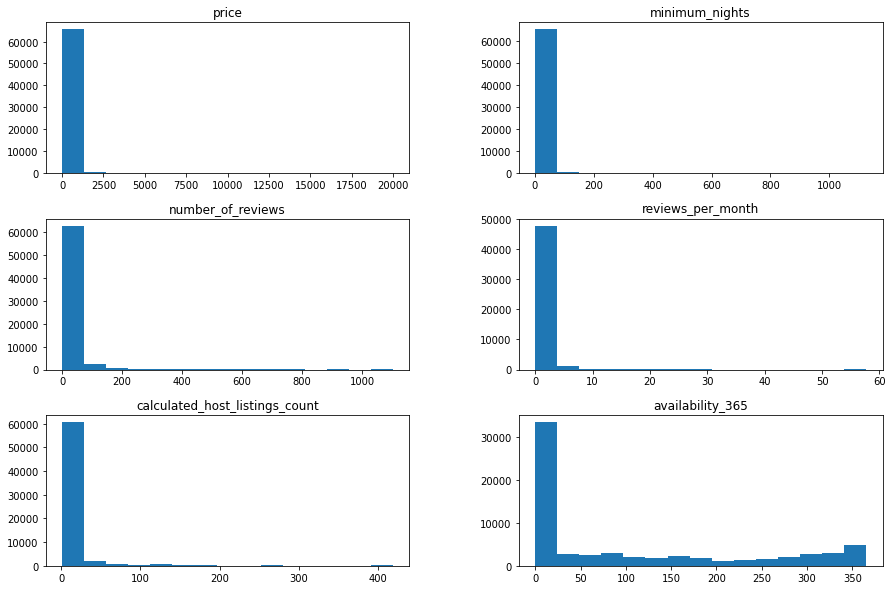

In [ ]:
# plotar o histograma das variáveis numéricas
df[["price", "minimum_nights", "number_of_reviews", "reviews_per_month",
    "calculated_host_listings_count", "availability_365"]].hist(bins=15, figsize=(15,10), grid=False);

In [ ]:
## Drop de Colunas q nao farao diferenca na analise

In [ ]:
df_clean = df.drop(["reviews_per_month", "last_review", "license", "neighbourhood_group"], axis=1)

In [ ]:
print(df_clean.shape)
print((df_clean.isnull().sum() / df_clean.shape[0] * 100).sort_values(ascending=False))
df_clean.dtypes

(66152, 14)
name                              0.033257
host_name                         0.009070
id                                0.000000
host_id                           0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
number_of_reviews_ltm             0.000000
dtype: float64


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
dtype: object

In [ ]:
## drop nas linhas nulas por representar pouca quantidade

In [ ]:
df_clean.isnull().sum()

id                                 0
name                              22
host_id                            0
host_name                          6
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
calculated_host_listings_count     0
availability_365                   0
number_of_reviews_ltm              0
dtype: int64

In [ ]:
df_clean.isnull().sum().sum()

28

In [ ]:
df_clean.dropna(inplace=True)
df_clean.shape

(66124, 14)

In [ ]:
## Outliers

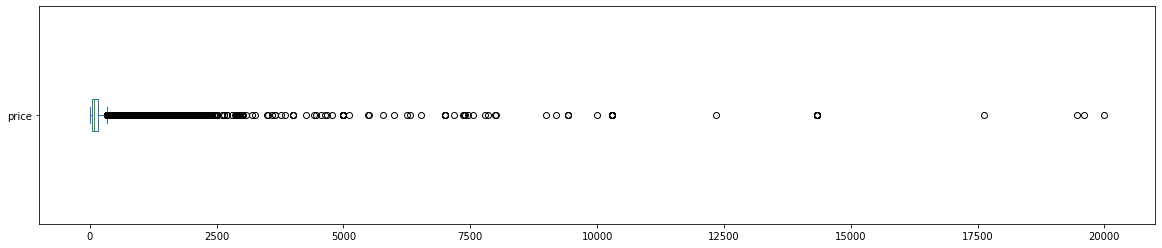

In [ ]:
# price
# boxplot antes do tratamento outlier
df_clean.price.plot(kind="box", vert=False, figsize=(20,4));

In [ ]:
df_clean.price.describe()

count    66124.000000
mean       159.428422
std        396.306795
min          0.000000
25%         50.000000
50%         90.000000
75%        164.000000
max      20000.000000
Name: price, dtype: float64

In [ ]:
q1_price = df_clean.price.quantile(0.25)
q3_price = df_clean.price.quantile(0.75)
iqr_price = q3_price - q1_price

sup_price = q3_price + 1.5 * iqr_price
inf_price = q1_price - 1.5 * iqr_price

In [ ]:
print(iqr_price)
print(sup_price)
print(inf_price)

114.0
335.0
-121.0


In [ ]:
df_clean.drop(df_clean[df_clean["price"]>sup_price].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean["price"]<=0].index, axis=0, inplace=True)

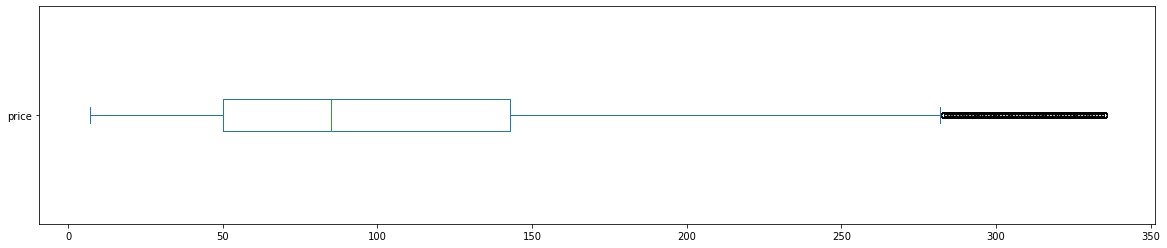

In [ ]:
# price
# boxplot antes do tratamento outlier
df_clean.price.plot(kind="box", vert=False, figsize=(20,4));

In [ ]:
df_clean.price.describe()

count    61018.000000
mean       104.394408
std         71.168702
min          7.000000
25%         50.000000
50%         85.000000
75%        143.000000
max        335.000000
Name: price, dtype: float64

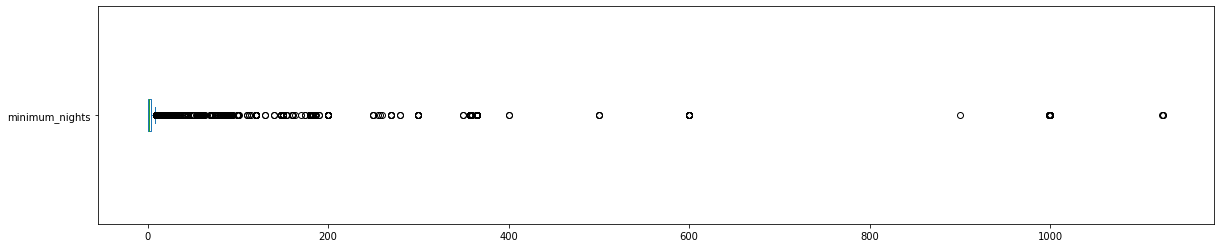

In [ ]:
# minimum_nights
# boxplot antes do tratamento outlier
df_clean.minimum_nights.plot(kind="box", vert=False, figsize=(20,4));

In [ ]:
df_clean.minimum_nights.describe()

count    61018.000000
mean         6.814137
std         30.919342
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max       1125.000000
Name: minimum_nights, dtype: float64

In [ ]:
q1_min_nights = df_clean.minimum_nights.quantile(0.25)
q3_min_nights = df_clean.minimum_nights.quantile(0.75)
iqr_min_nights = q3_min_nights - q1_min_nights

sup_min_nights = q3_min_nights + 1.5 * iqr_min_nights
inf_min_nights = q1_min_nights - 1.5 * iqr_min_nights

In [ ]:
print(iqr_min_nights)
print(sup_min_nights)
print(inf_min_nights)

3.0
8.5
-3.5


In [ ]:
df_clean.drop(df_clean[df_clean["minimum_nights"]>sup_min_nights].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean["minimum_nights"]<=0].index, axis=0, inplace=True)

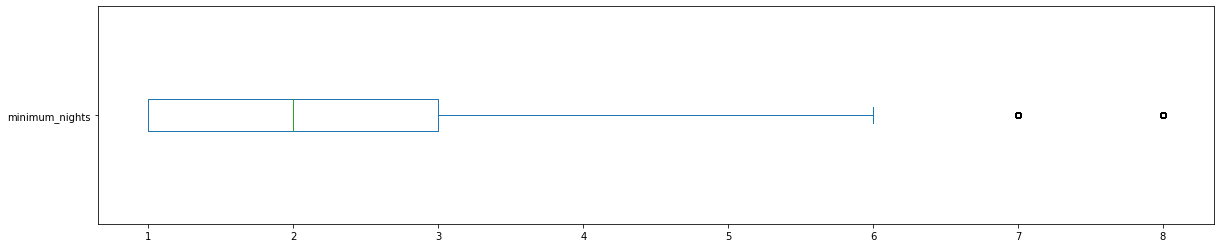

In [ ]:
# minimum_nigths
# boxplot depois do tratamento outlier
df_clean.minimum_nights.plot(kind="box", vert=False, figsize=(20,4));

In [ ]:
df_clean.minimum_nights.describe()

count    55598.000000
mean         2.605795
std          1.721124
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          8.000000
Name: minimum_nights, dtype: float64

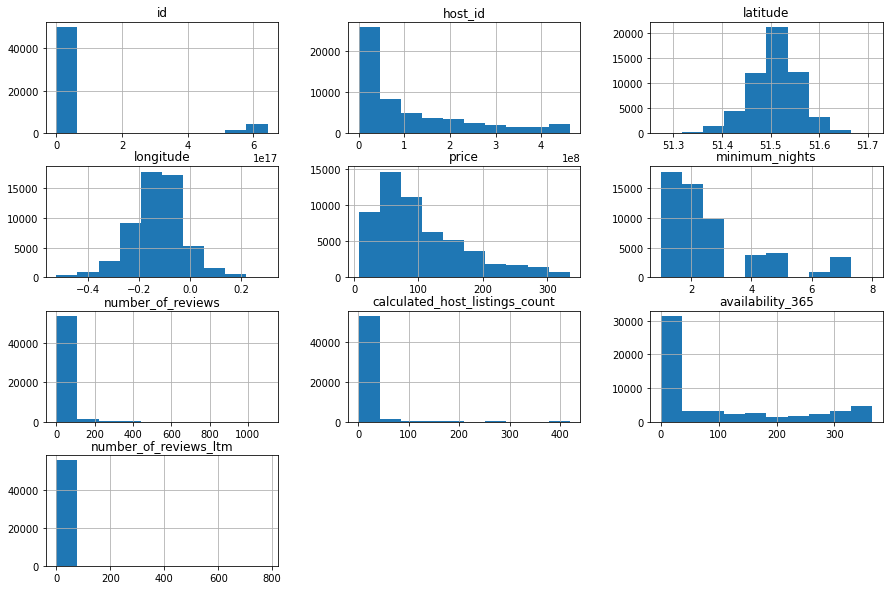

In [ ]:
df_clean.hist(figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**

In [ ]:
# ver a média da coluna `price`
df.price.describe()

count    66152.000000
mean       159.398159
std        396.233239
min          0.000000
25%         50.000000
50%         90.000000
75%        164.000000
max      20000.000000
Name: price, dtype: float64

In [ ]:
df_clean.price.describe()

count    55598.000000
mean       103.923073
std         70.778695
min          7.000000
25%         49.000000
50%         85.000000
75%        140.000000
max        335.000000
Name: price, dtype: float64

In [ ]:
df.price.mean()

159.39815878582658

In [ ]:
df_clean.price.mean()

103.92307277240188

### **Q4. Qual a correlação existente entre as variáveis**

In [ ]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 
                 'availability_365']].corr()
# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
price,1.000000,0.150650,-0.037728,0.097160,0.201687
minimum_nights,0.150650,1.000000,-0.091366,-0.028050,-0.053112
number_of_reviews,-0.037728,-0.091366,1.000000,-0.037408,0.082166
calculated_host_listings_count,0.097160,-0.028050,-0.037408,1.000000,0.129150
availability_365,0.201687,-0.053112,0.082166,0.129150,1.000000


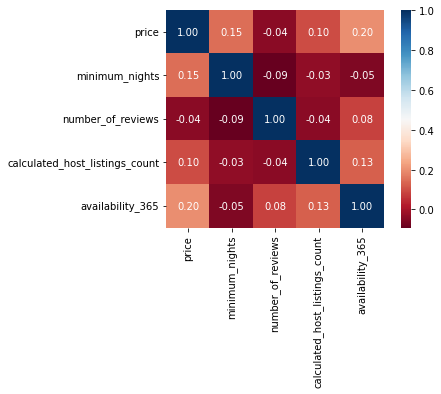

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [ ]:
df_clean["room_type"].unique()

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean["room_type"].value_counts()

Entire home/apt    30258
Private room       24761
Shared room          377
Hotel room           202
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean["room_type"].value_counts() / df.shape[0] *100

Entire home/apt    45.740114
Private room       37.430463
Shared room         0.569900
Hotel room          0.305357
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**



In [ ]:
# ver preços por bairros, na média
df.groupby("neighbourhood").price.mean().sort_values(ascending=False)

neighbourhood
Westminster               293.223899
Kensington and Chelsea    284.849695
City of London            211.826196
Hammersmith and Fulham    199.518871
Camden                    176.737862
Wandsworth                154.294136
Hounslow                  150.423150
Brent                     142.216069
Richmond upon Thames      141.138491
Islington                 141.127302
Barnet                    139.738241
Haringey                  134.538034
Kingston upon Thames      131.474903
Merton                    130.346260
Newham                    125.233375
Southwark                 125.223188
Greenwich                 124.378157
Hackney                   122.444689
Tower Hamlets             120.007865
Lambeth                   111.670549
Ealing                    103.339394
Havering                  100.163987
Redbridge                  98.776758
Lewisham                   98.437302
Waltham Forest             94.655777
Barking and Dagenham       91.908189
Harrow                  

In [ ]:
df_clean.groupby("neighbourhood").price.mean().sort_values(ascending=False)

neighbourhood
City of London            173.064103
Kensington and Chelsea    155.099575
Westminster               146.653400
Camden                    122.708923
Hammersmith and Fulham    113.532646
Richmond upon Thames      113.041126
Wandsworth                106.215336
Islington                 105.089672
Southwark                  97.632836
Merton                     96.773931
Lambeth                    94.920379
Brent                      94.666248
Tower Hamlets              94.640244
Hackney                    94.113610
Greenwich                  91.518203
Hounslow                   90.903122
Kingston upon Thames       90.462203
Newham                     90.219884
Barnet                     87.624697
Ealing                     82.599245
Havering                   81.432990
Barking and Dagenham       80.928962
Bromley                    79.788168
Waltham Forest             79.295067
Haringey                   78.850384
Hillingdon                 78.137008
Enfield                 

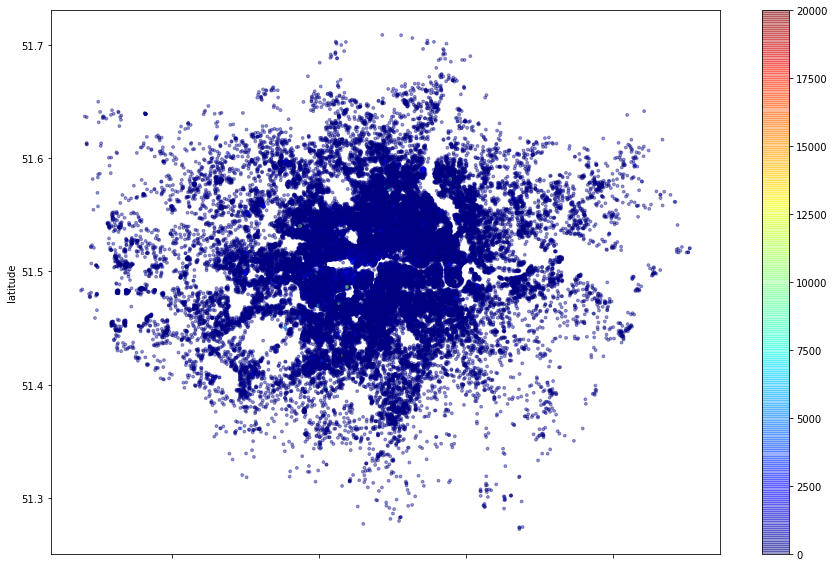

In [ ]:
# plotar os imóveis pela latitude-longitude
df.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(15,10));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna `minimum_nights`
df_clean.minimum_nights.describe()

count    55598.000000
mean         2.605795
std          1.721124
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          8.000000
Name: minimum_nights, dtype: float64

## Conclusões
